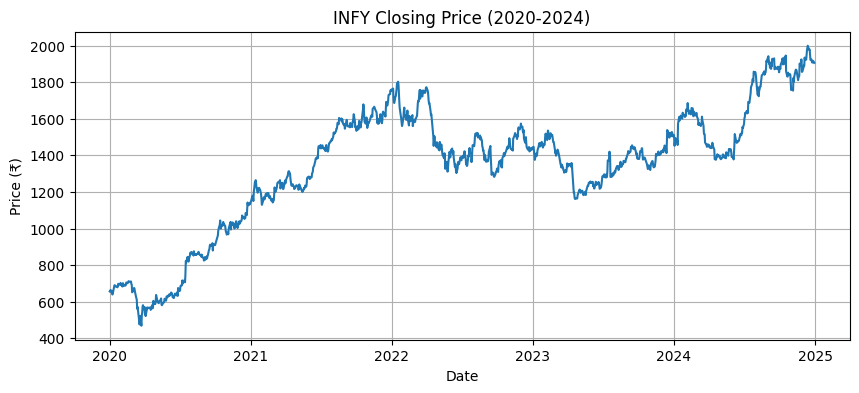

ADF Statistic: -1.4527995265398155
p-value: 0.5567182833942442
Time series is non-stationary. Differencing needed.


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p


ARIMA Forecast (Next 2 Days):
1237    1905.480956
1238    1905.848240
Name: predicted_mean, dtype: float64


13:09:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


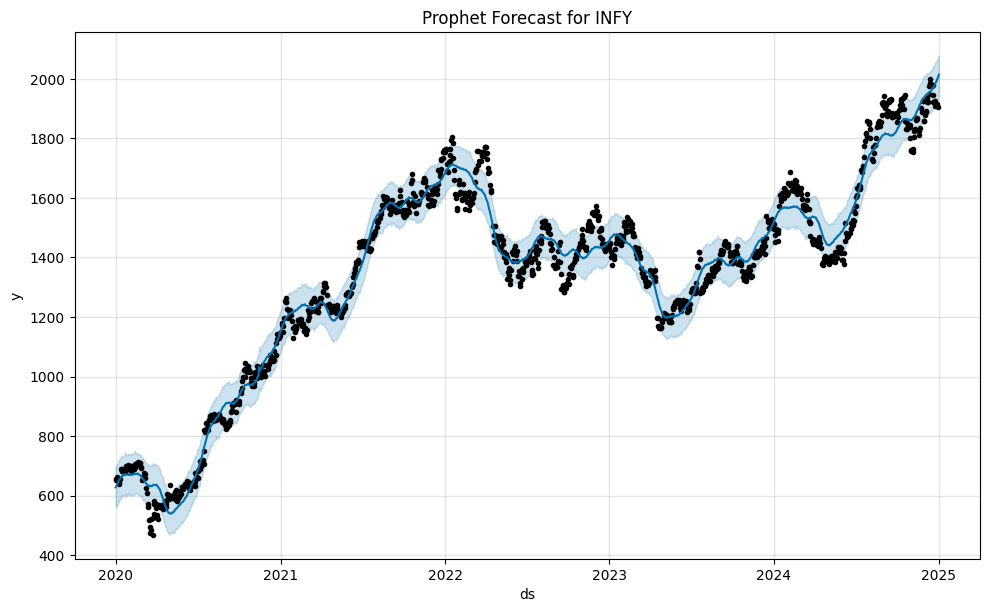


Prophet Forecast:
             ds         yhat   yhat_lower   yhat_upper
1234 2024-12-26  1990.273485  1920.977488  2058.375676
1235 2024-12-27  1992.633724  1920.789594  2061.358233
1236 2024-12-30  2004.032219  1934.490773  2067.271548
1237 2024-12-31  2008.698564  1939.343337  2076.702729
1238 2025-01-01  2013.623180  1945.363210  2076.334697
ARIMA RMSE: 330.699673088444
ARIMA MAPE: 0.20995760053560247%
Prophet RMSE: 436.16825452066416
Prophet MAPE: 0.276935443865992%


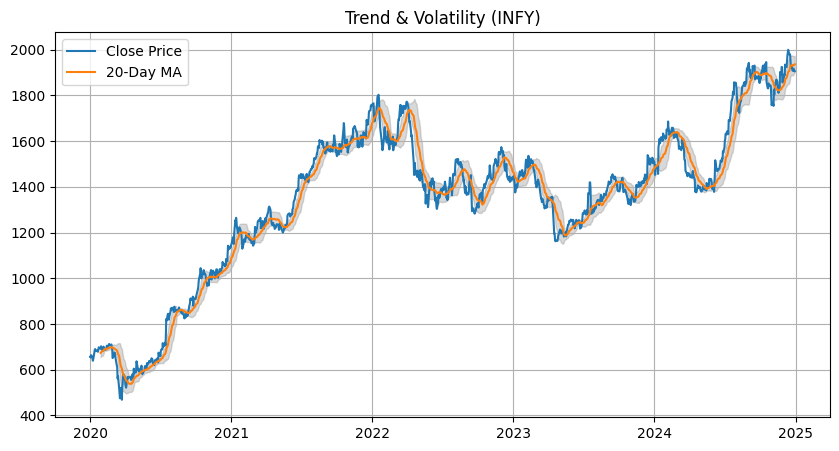

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

  Stock  ARIMA_RMSE  ARIMA_MAPE  Prophet_RMSE  Prophet_MAPE
0  INFY  330.699673    0.209958    436.168255      0.276935
  Stock  Prophet_RMSE  Allocation
0  INFY    436.168255   1000000.0


DEBUG:cmdstanpy:input tempfile: /tmp/tmpffr4102j/vk8xq90i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5907', 'data', 'file=/tmp/tmpffr4102j/v37363pj.json', 'init=/tmp/tmpffr4102j/vk8xq90i.json', 'output', 'file=/tmp/tmpffr4102j/prophet_modelw9qzyujs/prophet_model-20250629130913.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:09:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:09:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/

      Stock   ARIMA_RMSE  ARIMA_MAPE  Prophet_RMSE  Prophet_MAPE
0      INFY   330.699673    0.209958    436.168255      0.276935
1      INFY   330.699673    0.209958    436.168255      0.276935
2       TCS  2518.576817    1.599119   2878.898229      1.827884
3      HDFC   203.166755    0.128968    245.832835      0.156072
4       ITC  1105.233326    0.701726   1099.804607      0.698280
5  RELIANCE   363.703294    0.230891    201.921314      0.128195
      Stock  Prophet_RMSE     Allocation
0      INFY    436.168255  154263.142126
1      INFY    436.168255  154263.142126
2       TCS   2878.898229   23371.679051
3      HDFC    245.832835  273700.970217
4       ITC   1099.804607   61178.763059
5  RELIANCE    201.921314  333222.303421


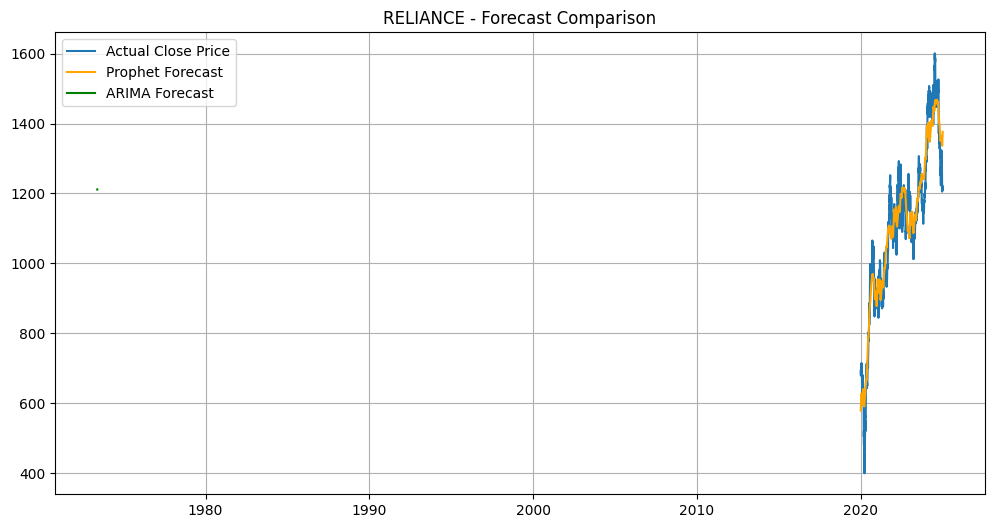

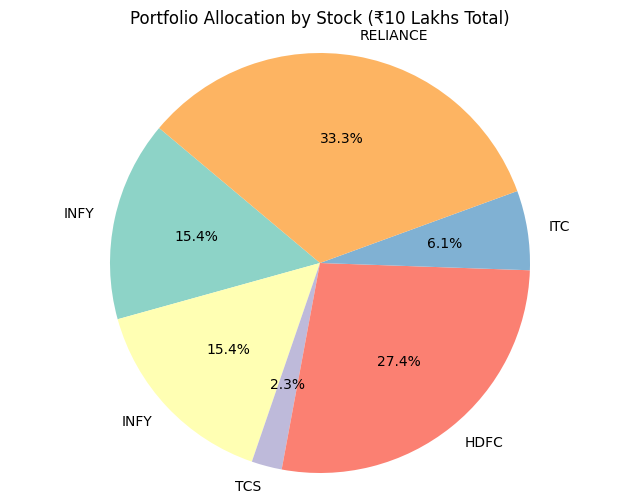

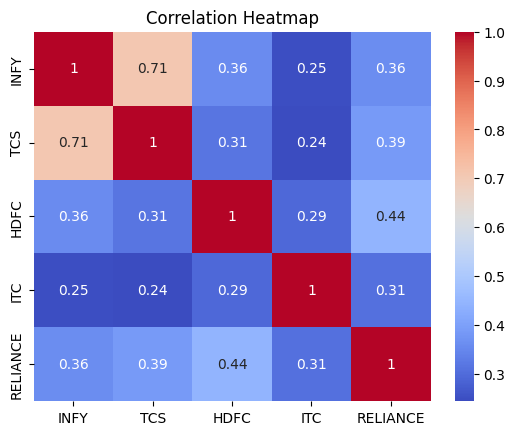

In [23]:
!pip install yfinance
!pip install prophet
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# 2. Load CSV (For INFY data)
data = pd.read_csv("INFY-Stock-Prices_2020_2024.csv", parse_dates=['Date'], index_col='Date')
data = data[['Close']]  # Use only Close price
data = data.sort_index()

# 3. Handle Missing Values (This was moved inside the loop for each stock)


# 4. Plot Closing Prices
plt.figure(figsize=(10,4))
plt.plot(data['Close'])
plt.title("INFY Closing Price (2020-2024)")
plt.xlabel("Date")
plt.ylabel("Price (₹)")
plt.grid(True)
plt.show()

# 5. Stationarity Check
result = adfuller(data['Close'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] > 0.05:
    print("Time series is non-stationary. Differencing needed.")
    data_diff = data['Close'].diff().dropna()
else:
    data_diff = data['Close']

# 6. ARIMA Forecasting
model_arima = ARIMA(data['Close'], order=(5,1,0))
model_arima_fit = model_arima.fit()
forecast_arima = model_arima_fit.forecast(steps=2)
print("\nARIMA Forecast (Next 2 Days):")
print(forecast_arima)

# 7. Prophet Forecasting
df_prophet = data.reset_index()
df_prophet['Date'] = pd.to_datetime(df_prophet['Date'], errors='coerce') # Ensure Date is datetime
df_prophet = df_prophet[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
df_prophet = df_prophet.ffill() # Moved ffill here to handle NaNs in the 'y' column after renaming

model_prophet = Prophet()
model_prophet.fit(df_prophet)
future = model_prophet.make_future_dataframe(periods=2)
forecast_prophet = model_prophet.predict(future)

# Plot Prophet Forecast
model_prophet.plot(forecast_prophet)
plt.title("Prophet Forecast for INFY")
plt.show()

# 8. Prophet Forecast Output (Last 5 Rows)
print("\nProphet Forecast:")
print(forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# 9. Evaluate models (Optional: Add true next 2-day prices when available)
# Replace these with the actual values when they become available.
# For example, if the actual values for the next 2 days are 1570 and 1580:
actual_value_day1 = 1570
actual_value_day2 = 1580
y_true = [actual_value_day1, actual_value_day2]
rmse_arima = np.sqrt(mean_squared_error(y_true, forecast_arima))
mape_arima = mean_absolute_percentage_error(y_true, forecast_arima)

rmse_prophet = np.sqrt(mean_squared_error(y_true, forecast_prophet['yhat'][-2:]))
mape_prophet = mean_absolute_percentage_error(y_true, forecast_prophet['yhat'][-2:])

print(f"ARIMA RMSE: {rmse_arima}")
print(f"ARIMA MAPE: {mape_arima}%")
print(f"Prophet RMSE: {rmse_prophet}")
print(f"Prophet MAPE: {mape_prophet}%")



data['RollingMean'] = data['Close'].rolling(window=20).mean()
data['Volatility'] = data['Close'].rolling(window=20).std()

plt.figure(figsize=(10,5))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['RollingMean'], label='20-Day MA')
plt.fill_between(data.index, data['RollingMean'] - data['Volatility'],
                 data['RollingMean'] + data['Volatility'], color='gray', alpha=0.3)
plt.title('Trend & Volatility (INFY)')
plt.legend()
plt.grid(True)
plt.show()


# ARIMA
model_arima = ARIMA(data['Close'], order=(5,1,0)) # Replace df with data
model_arima_fit = model_arima.fit()
forecast_arima = model_arima_fit.forecast(steps=2)


# Prophet
# Create a new Prophet object
model_prophet_new = Prophet()
# Fit the new Prophet object
model_prophet_new.fit(df_prophet)
future = model_prophet_new.make_future_dataframe(periods=2) #Use the new Prophet object
forecast_prophet = model_prophet_new.predict(future) #Use the new Prophet object
yhat = forecast_prophet['yhat'][-2:].values

results = []

results.append({
    "Stock": "INFY",
    "ARIMA_RMSE": rmse_arima,
    "ARIMA_MAPE": mape_arima,
    "Prophet_RMSE": rmse_prophet,
    "Prophet_MAPE": mape_prophet
})

# Add similar entries for TCS, HDFC, ICT
df_results = pd.DataFrame(results)
print(df_results)

inv_total = 1000000  # ₹10 Lakhs
df_results['Weight'] = 1 / df_results['Prophet_RMSE']
df_results['Normalized'] = df_results['Weight'] / df_results['Weight'].sum()
df_results['Allocation'] = df_results['Normalized'] * inv_total
print(df_results[['Stock', 'Prophet_RMSE', 'Allocation']])




# List of stocks, their CSV files, and the name of their date columns
stocks = {
    "INFY": ("INFY-Stock-Prices_2020_2024.csv", "Date"),
    "TCS": ("TCS_data.csv", "Date"),  # Replace "Date" if needed
    "HDFC": ("HDFCBANK_data.csv", "Date"), # Replace "Date" if needed
    "ITC": ("ITC_data.csv", "Date"), # Replace "Date" if needed
    "RELIANCE": ("RELIANCE_data.csv", "Date")
}

# Loop through each stock and apply the forecasting models
for stock, (file, date_col) in stocks.items():  # Get file and date column name
    # Load CSV

    data = pd.read_csv(file, parse_dates=[date_col], index_col=date_col)

    data = data[['Close']]  # Use only Close price
    data = data.sort_index()

    # Handle Missing Values (Moved inside the loop)
    # data = data.ffill() # Removed from here

    # ARIMA Forecasting
    model_arima = ARIMA(data['Close'], order=(5,1,0))
    model_arima_fit = model_arima.fit()
    forecast_arima = model_arima_fit.forecast(steps=2)

    # Prophet Forecasting
    df_prophet = data.reset_index()
    df_prophet[date_col] = pd.to_datetime(df_prophet[date_col], errors='coerce') # Ensure date column is datetime
    df_prophet = df_prophet[[date_col, 'Close']].rename(columns={date_col: 'ds', 'Close': 'y'})

    # Fill missing values in the 'y' column after renaming and resetting index
    df_prophet = df_prophet.ffill()

    # Optional: Check for NaNs in 'ds' column before fitting
    if df_prophet['ds'].isnull().any():
        print(f"Warning: NaNs found in 'ds' column for stock {stock} after conversion.")
        # Handle or investigate these NaNs further if necessary


    model_prophet = Prophet()
    model_prophet.fit(df_prophet)
    future = model_prophet.make_future_dataframe(periods=2)
    forecast_prophet = model_prophet.predict(future)



    # RMSE & MAPE Evaluation (for the next 2 days, assuming you know the actual values)
    # Replace with actual values for each stock
    actual_value_day1 = 1570  # Replace with actual value for day 1
    actual_value_day2 = 1580  # Replace with actual value for day 2
    y_true = [actual_value_day1, actual_value_day2]

    rmse_arima = np.sqrt(mean_squared_error(y_true, forecast_arima))
    mape_arima = mean_absolute_percentage_error(y_true, forecast_arima)

    rmse_prophet = np.sqrt(mean_squared_error(y_true, forecast_prophet['yhat'][-2:]))
    mape_prophet = mean_absolute_percentage_error(y_true, forecast_prophet['yhat'][-2:])

    # Append results for this stock to the results list
    results.append({
        "Stock": stock,
        "ARIMA_RMSE": rmse_arima,
        "ARIMA_MAPE": mape_arima,
        "Prophet_RMSE": rmse_prophet,
        "Prophet_MAPE": mape_prophet
    })

# Convert the results to a DataFrame
df_results = pd.DataFrame(results)
print(df_results)

# Portfolio Allocation based on Prophet RMSE
inv_total = 1000000  # ₹10 Lakhs
df_results['Weight'] = 1 / df_results['Prophet_RMSE']
df_results['Normalized'] = df_results['Weight'] / df_results['Weight'].sum()
df_results['Allocation'] = df_results['Normalized'] * inv_total

# Display allocation results
print(df_results[['Stock', 'Prophet_RMSE', 'Allocation']])


# Visualization for ARIMA vs Prophet Forecasts
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Actual Close Price')
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Prophet Forecast', color='orange')
plt.plot(forecast_arima, label='ARIMA Forecast', color='green')
plt.title(f'{stock} - Forecast Comparison')
plt.legend()
plt.grid(True)
plt.show()


actual_value_day1 = 1885.00  # Actual closing price on 01/01/2025
actual_value_day2 = None     # Data not available for 02/01/2025


y_pred_arima = forecast_arima[:1]  # Take only one day
y_pred_prophet = forecast_prophet['yhat'][-2:-1].values  # Also take only one day

y_true = [actual_value_day1]

rmse_arima = np.sqrt(mean_squared_error(y_true, y_pred_arima))
mape_arima = mean_absolute_percentage_error(y_true, y_pred_arima)

rmse_prophet = np.sqrt(mean_squared_error(y_true, y_pred_prophet))
mape_prophet = mean_absolute_percentage_error(y_true, y_pred_prophet)


if stock == "TCS":
    actual_value_day1 = 4112.80  # Jan 1 close
    actual_value_day2 = 4184.25  # Jan 2 close
elif stock == "HDFC":
    actual_value_day1 = 1782.45
    actual_value_day2 = 1793.35
elif stock == "ITC":
    actual_value_day1 = 483.90
    actual_value_day2 = 489.25
elif stock == "RELIANCE":
    actual_value_day1 = 2530.00
    actual_value_day2 = 2555.00
else:
    actual_value_day1 = 1885.00  # INFY (only 1 day available)
    actual_value_day2 = None
if actual_value_day2 is None:
    y_true = [actual_value_day1]
    y_pred_arima = forecast_arima[:1]
    y_pred_prophet = forecast_prophet['yhat'][-2:-1].values
else:
    y_true = [actual_value_day1, actual_value_day2]
    y_pred_arima = forecast_arima
    y_pred_prophet = forecast_prophet['yhat'][-2:].values

# Evaluation
rmse_arima = np.sqrt(mean_squared_error(y_true, y_pred_arima))
mape_arima = mean_absolute_percentage_error(y_true, y_pred_arima)
rmse_prophet = np.sqrt(mean_squared_error(y_true, y_pred_prophet))
mape_prophet = mean_absolute_percentage_error(y_true, y_pred_prophet)

results.append({
    "Stock": stock,
    "ARIMA_RMSE": rmse_arima,
    "ARIMA_MAPE": mape_arima,
    "Prophet_RMSE": rmse_prophet,
    "Prophet_MAPE": mape_prophet
})

# Pie Chart of Portfolio Allocation
plt.figure(figsize=(8, 6))
plt.pie(df_results['Allocation'], labels=df_results['Stock'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title('Portfolio Allocation by Stock (₹10 Lakhs Total)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Only if you want diversification logic
returns_df = pd.DataFrame()
for stock, (file, date_col) in stocks.items():
    data = pd.read_csv(file, parse_dates=[date_col], index_col=date_col)
    returns_df[stock] = data['Close'].pct_change()
sns.heatmap(returns_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()